[Course Link](https://courses.cognitiveclass.ai/courses/course-v1:CognitiveClass+DA0101EN+2017/courseware)

### Module 1 - Introduction

We are going to predict prices of used cars

[Link for data](http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

#### Data Description

[Link for Data description](http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names)

Symboling: denotes the risk factor associated with a car
Higher: more risky

Normalized losses: relative avg loss payment per insured vehicle year. This value is normalized

Price: Target value

This dataset is actually from 1985 so the car prices maay seem a little low

#### Read in the data:

In [1]:
# import the libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Setting column names

In [3]:
df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
              'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type',
              'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',
              'peak-rpm','city-mpg','highway-mpg','price']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Data Types in python

1. object: string in python
2. int64
3. float64
4. datetime64, timedelta


#### Why check data types:

Pandas automatically assigns types based on encoding from the text

Many times this may not be correct

It also helps us understand which python functions can be applied to a particular column

```
dataframe.dtypes

```

In [4]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

    bore: continuous from 2.54 to 3.94
    
    Here bore should have been float64

#### Check statistical summary of each col

This only considers numerical values

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Describe method can be used for object type cols as well

In [6]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Here 3 new measures are calculated: unique, top and freq

unique: number of distinct objects in the col
top: most frequesntly occuring object
freq: no of times the top object appears in the col

Some values are NaN as the particular stat metric cant be computed for that col data type

Another function is df.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

### Graded Review Questions

1. What does CSV stand for ?

    - Comma Separated Values Comma Separated Values - correct

2. In the data set what represents an attribute or feature?
    - Column

3. What is another name for the variable that we want to predict?

    - Target
    
4. What is the command to display the first five rows of a dataframe df?

    - df.head()
    
5. what command do you use to get the data type of each row of the dataframe df?

    - df.dtypes
    
6. How do you get a statistical summary of a dataframe df?

    -  df.describe()
    
7. If you use the method describe() without changing any of the arguments you will get a statistical summary of all the columns of type object?

    - False


### Module 2 - Data Wrangling

#### Data Pre processing (Data Cleaning or Data Wrangling):

- It is the process of converting or mapping data from initial 'raw' form into another format in order
    to prepare the data for further analysis
    
Steps:

- Missing Value treatment
- Data formatting
- Data Normalization (centering/scaling)
- Data Binning (binning creates bigger categories from a set of numerical values. This is particularly useful for comparing diff groups of data)
- Turning categorical values to numerical vars


#### Missing Value Treatment:

Missing value may appear as '?', 'N/A', 0 or just a blank cell

Options:

- Check whether the person who collected the data can go back and check what the actual value should be

- Remove the data where the missing value is found
    - u can either drop the whole var
    - drop the data entry
    - if not many of the data is missing u can drop those particular data entries

- Replace the missing value. Here we dont waste data, but its less accurate
    - replace with mean. What if values cannot be averaged, like categorical dtypes? In this case, we can use the mode
    - replace it based on other functions: sometimes the data gatherer might know soomething extra about the missing data. For eg he may know that the missing values generally tend to be old cars and the mormalized-losses value of old cars are higher than avg vehicle

- Leave it as missing data

Drop missing values:

    dataframe.dropna()

We can chose to drop rows or cols that contain missing avlues, like NaN 

    axis = 0: drops the entire row
    axis = 1: drops the entire col
    
Here there is a missing value for price

Since price is our target var we drop that row

    df.dropna(subset = ['price'], axis = 0, inplace = True)
    
Replace missing values:

    dataframe.replace(missing_value, new_value)
    
Replace normalized-losses missing value by mean

    mean = df['normalized-losses'].mean()
    df['normalized-losses'].replace(np.nan, mean)

#### Data Formatting

Data is usually collected from diff places, from diff people and may be stored in diff formats

Data Formatting is bringing data into a common standard of expression that allows users to make meaningful comparison

New York: NY, Ny New York, N.Y

Sometimes this unclean data is a good thing to see. If we are looking for diff ways people tend to write 'New York'
then this is exactly the data we want

Or if we are looking to spot fraud, N.Y. is likely to be an anomaly

But in most cases, we would want to convert them to same entity to make statistical analysis easier

There is a feature in our dataset: **city-mpg**. This is the car fuel consumption unit

    mpg is written after a number to indicate how many miles a vehicle can travel using one gallon of fuel. mpg is an abbreviation for 'miles per gallon'.

We want to convert this to: **city-L/100km**

    df['city-mpg'] = 235/df['city-mpg']
    
    df.rename(columns = {'city-mpg': 'city-L/100km'}, inplace = True)
    
**Incorrect Data Types:**

Sometimes a wrong data type may be assigned to a feature

Here price is a col of dtype: object which is wrong

If we dont do conversion to appropriate dtypes, our model may treat valid data as missing

    df['price'] = df['price'].astype('int')
    
#### Data Normalization

Range of length: 150-250
Range of width and ht: 50-100

We want to normalize these values st the range is consistent

This will make stat analysis easier as it will enable fair comparison
Also they will have the same impact

Consider a dataset with age and income

Age range: 20- 100
Income range: 2000 - 10000

Income is 100x higher

When we do analysis like LinearReg the attr income will intrinsicly influence the result more due to its larger value. 

But this doesnt mean that income is more important as a predictor

** So the nature of the data biases the LinearReg model to weigh income more heavily than age**

To avoid this we can normalize these 2 values in range 0 - 1

#### Approaches to Normalization

- Simple Feature Scaling
   Xnew = Xold/Xmax
   Here range will be bw 0 and 1
   
- Min-Max   
  Xnew = (Xold - Xmin)/(Xmax - Xmin)
  Here range will be bw 0 and 1
  
- Z score
  
  Xnew = (Xold - m)/sigma
  m is mean
  sigma is SD
  
  Resulting values hover around 0 and typically range bw -3 and +3 but can be higher or lower
  
#### Applying Normalization to length feature:

SFS:

    df['length'] = df['length']/df['length'].max()
    
Min-Max:

    df['length'] = (df['length'] - df['length'].min())/(df['length'].max() - df['length'].min())
    
Z-score:

    df['length'] = (df['length'] - df['length'].mean())/df['length'].std()


#### Data Binning

Binning - ** Grouping of values into 'bins'**

For eg u can bin age into: 0-5, 6-10, 11-15, ... so on

Binning can sometimes improve accuracy

Sometimes we use binning to group a set of numerical values into a smaller no of bins
to have a better understanding of data distribution

"price": range: 5000 to 45,500

We use 3 bins
- low 

- med 

- high 


We use unform ranges for all bins

In python:

    binwidth = int((max(df['price']) - min(df['price']))/4)
    
The function cut requires an extra bin so we divide by 4 instead of 3
    
Now we build the bin array:
    
    bins = range(min(df['price']), max(df['price']), binwidth)
    
Now we create labels foreach bin

    group_names = ['Low', 'Medium', 'High']
    
Finally we create a new col

    df['price_binned'] = pd.cut(df['price'], bins, labels = group_names)
    
We can then use histograms to visualize the dist
For eg, in our dataset most cars have low price

#### Turning Categorical vars into Quantitative vars

Most stat models cant take objects/strings as ip

In car dataset Fuel feature is cat var: gas or diesel

We add new features corresponding to each unique element in the original feature

Here there are 2 unique values: gas & diesel

So we add 2 new features: gas and diesel

    If(for a particular row) fuel = 'gas'
        gas = 1 for that row
    else 
        gas = 0 for that row
        
Similar for diesel

This method is called **One Hot Encoding**

We can do this in python:

    pd.get_dummies(df['fuel'])
    
### Lab:

In [8]:
df.head()

df.replace('?', np.nan, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
1.  **.isnull()**
2.  **.notnull()**

The output is a boolean value indicating whether the passed in argument value are in fact missing data.

In [9]:
missing_data = df.isnull()

missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each columns

In [10]:
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print (" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**

    "normalized-losses": 41 missing data, replace them with mean
    "stroke": 4 missing data, replace them with mean
    "bore": 4 missing data, replace them with mean
    "horsepower": 2 missing data, replace them with mean
    "peak-rpm": 2 missing data, replace them with mean
    
**Replace by frequency:**

    "num-of-doors": 2 missing data, replace them with "four". 
        * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to 
    

**Drop the whole row:**

    "price": 4 missing data, simply delete the whole row
        * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore they are not useful to us

#### Replacing the missing values for the above mentioned features with mean:

In [11]:
avg_1 = df['normalized-losses'].astype('float').mean(axis = 0)

avg_1

df['normalized-losses'].replace(np.nan, avg_1, inplace=True)

avg_2 = df['bore'].astype('float').mean(axis = 0)

df['bore'].replace(np.nan, avg_2, inplace=True)

avg_3 = df['stroke'].astype('float').mean(axis = 0)

avg_3

df['stroke'].replace(np.nan, avg_3, inplace=True)

avg_4 = df['horsepower'].astype('float').mean(axis = 0)

df['horsepower'].replace(np.nan, avg_4, inplace= True)

avg_5 = df['peak-rpm'].astype('float').mean(axis = 0)

df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

In [12]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [13]:
max_value = str(df['num-of-doors'].value_counts().idxmax())
max_value

'four'

In [14]:
df['num-of-doors'].replace(np.nan, max_value, inplace=True)

Finally, let's drop all rows that do not have price data:

In [15]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Good!** Now, we obtain the dataset with no missing values.

#### Correct Data Format

In [16]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.  

In [17]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
print("Done")

Done


In [18]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Wonderful!**

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

#### Data Standardization

Transform mpg to L/100km:
In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard

We will need to apply **data transformation** to transform mpg into L/100km?


In [19]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [20]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
#df['highway-mpg'] = 235/df["highway-mpg"]

#df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)
# check your transformed data 
#df.head()

#### Normalization

Normalize cols: length, width, height

In [21]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [22]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [23]:
df['length'].std()

0.05921275873275768

#### Binning

**Why binning?** 
<div>Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
 </div>

**Example: ** 
<div>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </div>

<div>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins <div>

In [24]:
df["horsepower"] = df["horsepower"].astype(float, copy=True)

We would like four bins of equal size bandwidth,the forth is because the function "cut"  include the rightmost edge:

we require  becoz

bins[0] - bins[1] : Low

bins[1] - bins[2] : Medium

bins[2] - bins[3] : High

In [25]:
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
print(binwidth)


53.5


We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [26]:
bins = np.arange(min(df['horsepower']), max(df['horsepower']), binwidth)

bins

group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 

In [27]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


#### Bins visualization 
Normally, a histogram is used to visualize the distribution of bins we created above. 

Text(0.5,1,'horsepower bins')

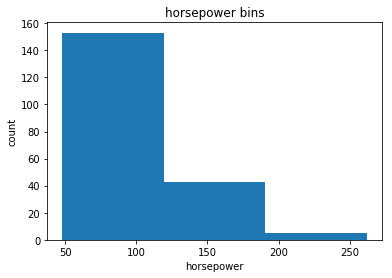

In [28]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### Indicator Vars

**What is an indicator variable?**
<div>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. </div>

**Why we use indicator variables?**
<div>So we can use categorical variables for regression analysis in the later modules.</div>

**Example**
<div>We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.</div>

<div>We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. <div>

In [29]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [30]:
df['fuel-type'].head(5)

0    gas
1    gas
2    gas
3    gas
4    gas
Name: fuel-type, dtype: object

In [31]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])

dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


change column names for clarity

In [32]:
dummy_variable_1.rename(columns={'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace=True)

dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset. 

In [33]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [34]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [35]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [36]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])

dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
dummy_variable_2.rename(columns={'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [38]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,13495.0,11.190476,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500.0,11.190476,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950.0,9.791667,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450.0,13.055556,Medium,0,1,1,0


Save the clean csv

In [39]:
df.to_csv('./data/clean_df.csv')

> **End of Lab**

### Graded Review Questions

1. Consider the dataframe "df" what is the result of the following operation df['symbolling'] = df['symbolling'] + 1?:
    
    Every element in the column "symbolling" will increase by one Every element in the column "symbolling" will increase by one - correct
    
2. Consider the dataframe "df", what does the command df.rename(columns={'a':'b'}) change about the dataframe "df"
     
     nothing as you must set the parameter "inplace =True " nothing as you must set the parameter "inplace =True " - correct
     
3. Consider the dataframe "df" , what is the result of the following operation df['price'] = df['price'].astype(int) ?
    
    convert or cast the column 'price' to an integer value convert or cast the column 'price' to an integer value - correct
    
4. Consider the column of the dataframe df['a']. The colunm has been standardized. What is the standard deviation of the values, i.e the result of applying the following operation df['a'].std() :
     
     1 - correct

5. Consider the column of the dataframe df['Fuel'], with two values 'gas' and' diesel'. What will be the name of the new colunms pd.get_dummies(df['Fuel']) ?
     
     Gas and diesel Gas and diesel - correct
     
6. What are the values of the new columns from part 5 a)
     
     1 and 0 1 and 0 - correct

### Exploratory Data Analysis

EDA is a preliminary step in Data Analysis to:

- Summarize main characteristics of data
- Gain better understanding of the data set
- Uncover relationships bw different vars
- Extract imp vars for the prob

Main Question:

** What are the characteristics that have the most impact on the car price? **

#### Descriptive Statistics:

When we get the data, it is important to first explore the data before we start building complicated
models

One easy way is to calculate DS for the data

One way is using ```describe()``` function

In [40]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


This computes basic statistics for all **numerical** vars

It shows mean, total no of data pts, std, quartiles and extreme values

Any NaN values are automatically skipped

This gives clear idea about distribution of the vars

Summarize **Categorical** vars by ```value_counts()``` function

In [41]:
drive_wheels_counts = df['drive-wheels'].value_counts()

drive_wheels_counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

**Box Plots**:

These are another great way to visualize numeric data

It helps us spot outliers and also understand the distribution

**Scatter Plots**:

These are for continuous vars

Price and engiine size are cont vars

What if we want to understand relationship bw engine size and price

We can do this with Scatter Plots

x axis: Predictor
y axis: Target

Text(0,0.5,'Price')

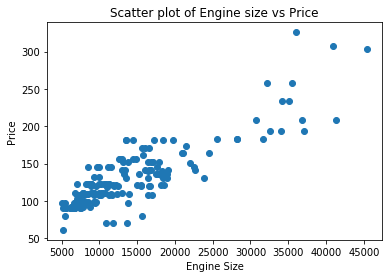

In [42]:
y = df['engine-size']

x = df['price']

plt.scatter(x, y)

plt.title('Scatter plot of Engine size vs Price')

plt.xlabel('Engine Size')

plt.ylabel('Price')

    As Engine Size inc, Price also inc

    So there is a positive linear relattionship bw them

#### GroupBy in Python:

Say we want to find if there is some rel bw the types of dive systems (forward, rear and 4 wheel drive)

We would want to group by the drive-wheels and compare them with each other

This an be done using the ```Groupby()``` method

This method works on categorical vars

We can group by single or multiple vars

For eg, we want to find avg price of vehichles and observe how they vary bw: types of body-styles and drive-wheels

We first pick out the cols we are interested in:

    df_test = df['drive-wheels', 'body-style', 'price']
    
    df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
    
Here each subcategory will be in each separate row

This can be a bit difficult to read

We can use the ```pivot()``` method to better visualize the data

A Pivot Table has one var displayed along cols and the other var displayed along the rows

    df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
    
Another way to represent Pivot Table is using a **Heatmap Plot**

This takes a rectangular grid of data and assigns a color intensity based on the data value
at the grid pts

    plt.color(df_pivot, cmap='RdBBu')
    
    plt.colorbar()
    
    plt.show()
    
#### Analysis of Variance (ANOVA):

Assume we want to analyse a categorical var and study the corr among diff categories

Question:

How diff categories of the make feature have impact on the price?

This diag shows avg price of diff vehichle makes:

![](./data/img/diag0)

To analyze cat vars we can use ANOVA

ANOVA can be used for:

- Finding corr bw diff groups of a cat var

ANOVA test returns 2 values:

- F test score: variation bw sample group means divided by varation bw sample group

- p value: confidence degree

![](./data/img/diag1)

This diag illustrates a case where F test score is small

Variation within each group is way larger than varation bw avg values of each group

Say group1 is Honda and group2 is Subru

Since F score is small, the corr bw price as the target var and the grouping is weak

Probably this means that given the make we cant quite say what the price will be

![](./data/img/diag2)

Here the F test score will be larger

The var bw the avgs of the 2 groups is comparable to the variation within the 2 groups

Say group1 is Jaguar and Group 2 is Honda

Since F score is large, the corr is strong

So given the make, say Jaguar since the data points are in a distinct cluster, we can somewhat say
what the price will be

![](./data/img/diag3)

This chart shows the avg prices for various car makes

As we can see from bar chart we expect a small F score for Honda and Subru as there is small diff bw the avg prices

![](./data/img/diag4)

We can expect a large F value bw Honda and Jaguar as the diff in prices is very significant

But this chart merely provides an intuition. We do not know the exact variances here

- ANOVA bw Honda and Subru

We extract the make and price data

    df_anova = df[['make', 'price']]
    
Group data by diff makes

    grouped_anova = df_anova.groupby(['make'])
    
The ANOVA test can be performed in Python using the ```f_oneway()``` method of scypi package

We pass the price data of the 2 car make groups that we want to compare and it calculates the ANOVA results:

    anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
    
    Results: F: 0.197 p=.661
    
        
As F < 1 & p > 0.05: prices bw hondas and subaru are not significantly diff

    anova_results_2 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])
    
    Results: F: 401 p=1.06
    
** We can say that there is a strong corr bw a cat var and other vars if the ANOVA
test gives us a large F test value and a small p value **


#### Correlation:

- Corr is a stat metric for measuring to what extent diff vars are interdependent

In other words, if we look at 2 vars over time, if one var changes, how does this change affect the other var?

Smoking is corr to lung cancer

Rain is corr to umbrella

- Corr does not imply causation

We can say that umbrella and rain are corr, but we cant say whether umbrella caused the rain or rain caused the umbrella

** Corr bw engine-size and price**:

    sns.regplot(x = 'engine-size', y = 'price', data = df).Plt.ylim(0,)
    
The goal of this plot is to see if engine size has any role on the price

The st line through the plot is very steep which shows there is a positive linear rel

So there is +ve corr bw engine size and price

Similarly there is a -ve linear rel bw highway-mpg and price

    Although the rel is -ve, the slope of the line is steep, which means that highway-mpg is a good predictor of price

Similarly, peak-rpm and price has weak corr

    Both low peak rpm and high peak rpm have values of low and high prices
    
    So we cannot use peak rpm to predict prices



#### Corr Statistics:

** Pearson Corr **

- Measure the strength of corr bw 2 features
    Perasonn Corr gives 2 values:
    - Corr Coeff
    - P value 

- Corr coeff
    - Close to +1: Large +ve rel
    - Close to -1: Large -ve rel
    - Close to 0: No rel
    
- P value: This tells us **how certain** we are about the corr that we calculated
    - p < 0.001: Strong certainty in the result
    - p < 0.05: Moderate
    - p < 0.1: Weak
    - p > 0.1: No certainty
    
![](./data/img/diag5)

The following plot shows data with diff corr values

We can calculate Pearson Corr using the scypi stats package:

    Person_coeff, p_value = stats.pearsonr(df['horsepower'], df['price'])

    Corr coeff = 0.81
    
    p value: 9.35 e-48
    
    We are certain about the strong +ve corr
    
    

### Lab

we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [43]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower. :

In [44]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines. 

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Let's find the scatterplot of "engine-size" and "price" 

(0, 55943.56476492931)

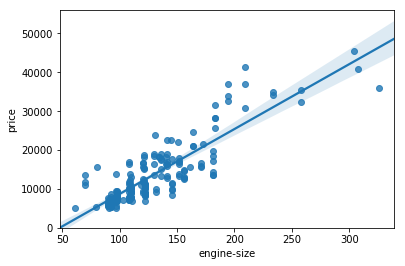

In [45]:
sns.regplot(x='engine-size', y='price', data=df)

plt.ylim(0,)

    As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. 
    
 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87:

In [46]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


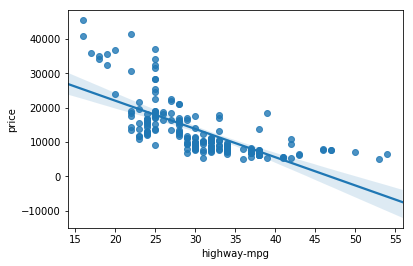

In [47]:
sns.regplot(x='highway-mpg', y='price', data=df)

In [48]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


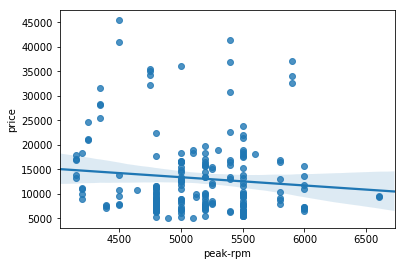

In [49]:
sns.regplot(x='peak-rpm', y='price', data=df)

    Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

In [50]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Find the correlation between x="stroke", y="price". :

In [51]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


Given the correlation results between "price" and "stroke" do you expect a linear relationship? Verify your results using the function "regplot()".

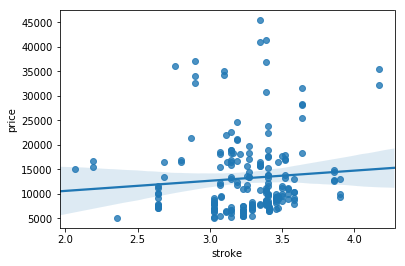

In [52]:
sns.regplot(x='stroke', y='price', data=df)

    There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.  We can see this use "regplot" to demonstrate this.
    
** Categorical vars:**

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".

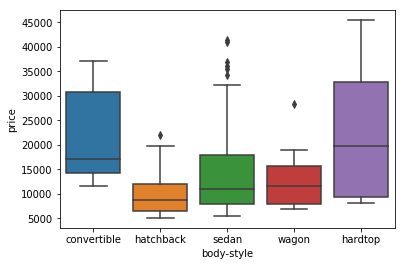

In [53]:
sns.boxplot(x='body-style', y='price', data=df)

    We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price" :

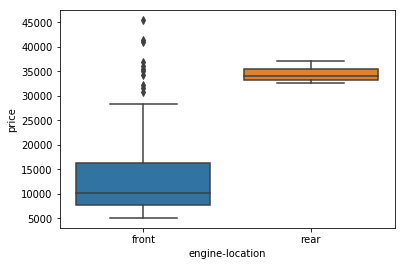

In [54]:
sns.boxplot(x="engine-location", y="price", data=df)

    Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.
    
 Let's examine "drive-wheels" and "price".:

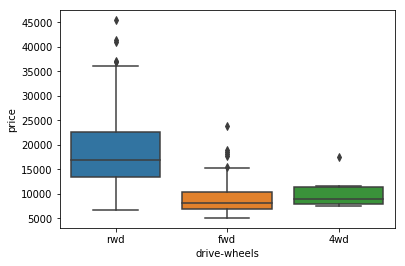

In [55]:
sns.boxplot(x="drive-wheels", y="price", data=df)

    Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

** Desc Stat Analysis**:

Let's first take a look at the variables by utilising a description method.

The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:
- the count of that variable
- the mean
- the standard deviation (std) 
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value


In [56]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [57]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


** Value Count**:

Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. 

Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. 

As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".


In [58]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe as follows :

In [59]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.:

In [60]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Now let's rename the index to 'drive-wheels':

In [61]:
drive_wheels_counts.index.name = 'drive-wheels'

drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.:

In [62]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()

engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)

engine_loc_counts.index.name = 'engine-location'

engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


    Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.


** Basics of Grouping**:

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [63]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

In [64]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

# df_group_one is not aggregated by price yet

we can then calculate the average price for each of the different categories of data.

In [65]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()

df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


    From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.
    
You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'

In [66]:
df_grptest = df[['drive-wheels','body-style','price']]

grouped_test1 = df_grptest.groupby(['drive-wheels','body-style'], as_index=False).mean()

grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.


In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [67]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [68]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Use the "groupby" function to find the average "price" of each car based on "body-style" ?

In [69]:
df_grptest2 = df[['body-style','price']]

grouped_test2 = df_grptest.groupby(['body-style'], as_index=False).mean()

grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Let's use a heat map to visualize the relationship between Body Style vs Price:

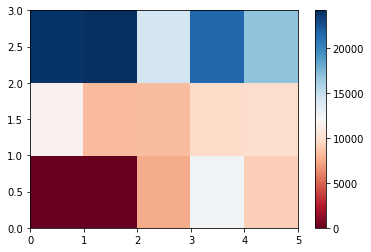

In [70]:
plt.pcolor(grouped_pivot, cmap = 'RdBu')

plt.colorbar()

plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style', The default labels convey no useful information to us. Let's change that:

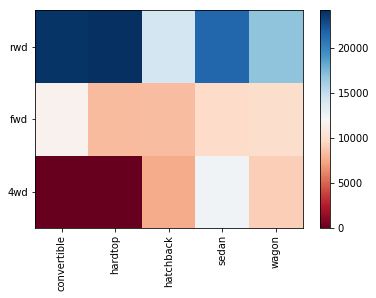

In [71]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### Correaltion and Causation

**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining  correlation is much simpler  the determining causation as causation may require independent experimentation 

In [72]:
df.corr() # calculates the Pearsons Corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


#### Wheel base vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [73]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822266  with a P-value of P = 8.07648827073e-20


##### Conclusion:

    Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

#### Horse Power vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [74]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.809574567004  with a P-value of P = 6.36905742826e-48


##### Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

#### Width vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [75]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.751265344052  with a P-value of P = 9.20033551048e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

#### Curb weight vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'.

In [76]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.83441452577  with a P-value of P = 2.18957723889e-53


##### Conclusion:

Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

#### Engine size vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'.

In [77]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.872335167446  with a P-value of P = 9.2654916222e-64


##### Conclusion:

Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

#### Bore vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'.

In [78]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.543155383263  with a P-value of P = 8.04918948394e-17


##### Conclusion:

Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

#### City-mpg vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'.

In [79]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.686571006784  with a P-value of P = 2.32113206557e-29


##### Conclusion:

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

#### Highway-mpg vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'.

In [80]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.704692265059  with a P-value of P = 1.74954711445e-31


##### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

#### ANOVA

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells how statistically significant is our calculated score value

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

#### Drive Wheels:

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [81]:
grouped_test2 = df_grptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


We can obtain the values of the method group using the method "get_group":

In [82]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

we can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [83]:
# ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'],
                             grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.9540650078 , P = 3.39454435772e-23


    This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?
    
#### Separately: fwd and rwd

In [84]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.553316096 , P = 2.23553063557e-23


#### 4wd and rwd

In [85]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.58068136892 , P = 0.00441149221123


#### 4wd and fwd

In [86]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.665465750252 , P = 0.416201166978


#### Conclusion: Important Vars

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

### End of Lab

---

#### Graded Review Questions:

- Consider the dataframe "df". Which method provides the summary statistics?

    - df.describe() df.describe() - correct
 
- Consider the following dataframe:

    df_test = df['body-style', 'price']

    The following operations is applied:

    df_grp = df_test.groupby(['body-style'], as_index=False).mean()

    What are resulting values of df_grp[‘price’]:

    - The average price for each body style The average price for each body style - correct

- Correlation implies causation :

    - False - correct
    
- What is the minimum possible value of Pearson's Correlation :

    - 1
    
- What is the Pearson correlation between variables X and Y, if X=Y:

    - 1
    

---

### Model Development

A model can be thought of as a mathematical eqn used to predict a value given one or more other values

It relates one or more independent vars to dependent vars

For eg, u input to model highway-mpg as ind var. The op is the dependent var or price

Usually the more relevant data we have, more accurate is our model

To understand why more data is reqd say pink cars have lesser price

If we do not include the feature: color, the model may output the same price for red and pink car which is false


#### Linear Reg and Multiple Linear Reg

- Simple Linear Reg will refer to single ind var to make a pred
- Mul LR will refer to multiple ind vars to make pred

SLR is a method to help us understand rel bw 2 vars: predictor/ind var x and target/dep var y

We would like to come up with a lin rel:

    y = bo + b1.x
   
When we fit or train the model, we will come up with the params bo and b1

This step reqs lots of math, so we will not focus on this part

#### Predn step:

Its hard to figure how much a car costs

But highway-mpg is given in the manual

If there is a lin rel bw these 2 vars, we can use this to get price from highway-mpg by finding price for a particular highway-mpg from the line as shown below:

![](./data/img/diag6)

But how to plot that line?

- In order to determine the line, we take data pts from our dataset 

- We then use these training pts to fit our model

- The results are the params : (bo, b1)

We usally store the data pts in 2 dfs or numpy arrays, X and Y

X is for dep vars

Y is for target var

Each sample corresponds to a row in the array

![](./data/img/diag7)

Many factors influence how much people pay for a car

For eg, make or how old the car is are 2 such factors

In this model, this uncertainty is taken into account by assuming a small random value is added to a pt on the line

This is called noise

![](./data/img/diag8)

The fig on the left shows distribution of the noise

The horizontal axis shows the value added

The vertical axis shows the prob that the value will be added

Usually a small +ve or -ve value is added

![](./data/img/diag8)

Sometimes, large +ve or large -ve values may be added

![](./data/img/diag9)

But for most part (high prob) values added are near 0

#### Summarizing SLR Process:

![](./data/img/diag10)

- We have a set of training pts (red pts in left fig)

- We use these to fit our model and get params (bo and b1)

- We then use the params in the model

- We now have a model: y^ = bo + b1.x
    ^: model is an estimate

    ![](./data/img/diag11)
    
- We use this model to predict values we have not seen

- We have no data pt for 20 highway-mpg, but we can use our model to get price for the car

- Our model is not always correct. We can see this by comparing predicted value to the actual value

- We have a sample for 10 highway-mpg. But pred val does not match actual val

    If linear assumption is correct, this error is due to the **noise**, but there can be other reasons

In Python:

    lm = LinearRegression()
    
We define predictor var and target var

    X = df[['highway-mpg']]
    Y = df[['price']]
    
Then we fit the model to find bo and b1
    
    lm.fit(X, Y)
    
We can obtain a prediction:
    
    Y_hat = lm.predict(X)
    
The op is an array with same no of samples as ip X (one pred for 1 ip sample)

    bo: lm.intercept_
    
    b1: lm.coeff_
    
---
    
#### Multiple Linear Reg

This method is used to explain rel bw:

- One continuous target (Y) var

- 2 or more predictor (X) vars

If we have 4 pred vars:

    y^ = bo + b1.x1 + b2.x2 + b3.x3 + b4.x4
    
bo : intercept
b1 : coeff or param for x1
...
and so on

If there are 2 pred vars then we can visualize the values

Say:

    y^ = 1 + 2.x1 + 3.x2
    
The vars x1 and x2 can be visualized on a 2D plane:

![](./data/img/diag12)

The table has values for x1 and x2

The values are plotted on a 2D plane

Each value of x1 and x2 is mapped to a value y^

These value sof y^ are mapped in vertical direction:

![](./data/img/diag13)

In python:

We can extract the 4 pred vars and store them in var Z:

    Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
    
Then train the model as before:
    
    lm.fit(Z, df['price'])
    
Obtain a predn:
    
    y_hat = lm.predict(X)
    
In this case ip X is a df with 4 cols. the no of rows corr to the no of samples

The op y_hat is an array with the same no of elements as no of sample

---

#### Model Evaluation using Visualization

Regression Plot:

They give a good estimate of:

- the rel bw the 2 vars

- strength of corr

- direction of rel (+ve or -ve)

Residual Plot:

![](./data/img/diag14)

The Res plot represents the error bw actual and pred value

We obtain the diff bw pred value (Yo^) and actual value (Yo) for a particular value of Xo

We then plot this value (Yo^ - Yo) on the vartical axis with dependent var Xo on the horizontal axis

We repeat the process for all samples

The plot thus generated is called the **Residual Plot**

![](./data/img/diag14.1)

- We expect to see the results have **0 mean**

- The results should be distributed **evenly around the X axis with similar variance**

- There should be no curvature

    This type of residual plot suggests that a Linear Model is appropriate

![](./data/img/diag15)

In this RP there is a curvature

the values of the error change with X

In Left all errors are +ve
In middle all are -ve
In right all are +ve again

Thus residuals are not randomly spread around the X axis

**Thus linear assumption is incorrect**

A non linear model may be appropriate in this case

![](./data/img/diag16.1)

In this plot variance of residuals inc with X

Thus residuals are not randomly spread around the X axis

Model is incorrect

In python:

    sns.residplot(df['highway-mpg'], df['price'])
    
![](./data/img/diag16)

In this case residuals have  a curvature


#### Distribution Plots

This plots pred value vs actual value

They are v useful for visualizing models with more than 1 ind var

![](./data/img/diag17)

First we count the no of pred values == 1 in the left

We plot them in the right (in blue)

Similarly for 2 and 3

![](./data/img/diag18)

Then we repeat the process for the target values

Here all the target values are ~ 2

The target and pred values are cont

![](./data/img/diag19)

We plotted a hist

But a hist is for discretev vals

So pandas converts them to a distribution

The vertical axis is scaled to make the are under the dist == 1

![](./data/img/diag20)

We can now compare 2 dist plots

Fitted values are in blue 

Actual are in red

![](./data/img/diag21)

We see for prices in the right box (40k - 50k price) pred values are inaccurate

We see for prices in the left box (10k - 20k price) pred values are much more accurate

![](./data/img/diag22)

In the left diag we use multiple features 

Here the pred values are much closer to the actual values

In python:

    ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual value')
    
    sns.distplot(y_hat, hist = False, color = 'b', label = 'Fitted value', ax = ax1)



#### Polynomial Regression and Pipelines

What do we do when a linear model is not the best fit for our data?

There is another type of reg model: poly reg

We transform our data into a poly, then use linear reg to fit the param

- Poly reg is a special case of lin reg

- Useful for describing curvilinear rel
    - Curv rel: By squaring or setting higher order terms of predictor vars
    
![](./data/img/diag23)

Model may be:

- Quadriatic - 2nd order: pred var is sqd
- Quadriatic - 3rd order: pred var is cubed
- There may also exist even higher order poly reg when a good fit has not been achieved by 2nd or 3rd orders

![](./data/img/diag24)


In python:

Calculate poly of 3rd order:

    f = np.polyfit(x, y, 3)
    p = np.polydl(f)
    
Print model:

    print(p)
    
    -1.557(x1)^3 + 204.8(x1)^2 +8965.x1 + 1.37x10^5
    
---
    
Multi dim poly reg:

The expressions get very complicated and numpy's polyfit function cant compute this

These are some of the terms for a **2nd order 2D poly**:

    Y^ = bo + b1X1 +b2X2 + b3X1.X2 + b4(X1)^2 + b5(X2)^2 + ..
    
So we use preprocessing library in scikit learn

    from sklearn.preprocessing import PolynomialFeatures
    
Create a poly feature obj with deg 2

    pr = PolynomialFeatures(degree = 2)
    
Then we transform the features into a poly feature with the fit_transform method:

    x_polly = pr.fit_transform(x[['horsepower', 'curb-weight']], include_bias = False)
    
![](./data/img/diag25)

The diag shows an example

Consider the features: X1 and X2 shown

Applying the method, we **transform** the data

We now have a new set of features (X1, X2, X1X2, X1^2, X2^2) that are transformed version of our original features

These will now be the params to our poly reg eqn

---


As dimension of data gets larger we may want to normalize multiple features

We can normalize each feature simultaneously:

    from sklearn.preprocessing import StandardScaler
    
    SCALE = StandardScaler()
    
    SCALE.fit(x_data[['horsepower', 'highway-mpg']])
    
Get a new df:

    x_scale = SCALE.transform(x_data[['horsepower', 'highway-mpg']])
    
#### Pipelines

This is used to **simplify our code**

![](./data/img/diag26)

There may be many steps to getting a prediction

- Normalization

- Poly Transform

- Linear Reg

We simplify the process using a Pipeline

Pipelines sequentially perform a series of transformations

The last step carries out the predn

Import libraries:


    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler
 
    from sklearn.pipeline import Pipeline
    
We create a list if tuples. First elem in the tuple contains the name of the estimator

The second elem contains model constructor

    Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2)), 
    ('mode', LinearRegression())]
    
We input the list in the Pipeline constructor:

    pipe = Pipeline(Input)
    
We now have a Pipeline obj

We can train the pipeline by applying the train method to the Pipeline obj

    Pipe.train(X['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], y)

We can produce a predn:

    y_hat = pipe.predict(X['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'])
    
![](./data/img/diag27)

The method does:

- Normalizes the data (StandardScaler)

- Performs a Poly transform (PolynomialFeatures)

- Outputs a predn (LinearRegression)


---


#### Measures for In-sample Evaluation

We have seen how we can eval a model by visualization

Now we wanna numerically eval our models

Measures are a way to numerically determine how good the model fits the data

2 imp measures that determine the fit of a model are:

- MSE
- R-squared (R^2)

**MSE**:

To determine MSE we find diff bw actual value y and pred val y^ and then square it

![](./data/img/diag28)

Here y = 150 and y^ = 50

y-y^ = 50 -> 50^2

Then we get avg of all the errors by adding them all and div by no of samples

![](./data/img/diag29)

In python:

    from sklearn.metrixs import mean_squared_error
    
    mean_squared_error(df['price'], Y_predict_simple_fit)
    
The mean_squared_error function gets 2 ips : actual val of target var and the pred value of target var

**R^2**:

- This is also called the **Coeff of Determination** 

- It is a measure to determine how close the data is to the fitted reg line

- It is the **percentage of variation of the target var Y that is explained by the linear model**

- We can think about R^2 as comparing a regression model to a simple model i.e. the mean of the data points


        R^2 = (1 - (MSE of regression line)/(MSE of the avg of the data))
        
It typically ranges bw 0 and 1, but may be -ve also

![](./data/img/diag30)

Here the reg line provides quite a good fit

Blue line: reg line

Blue sqs: MSE of reg line

Red line: avg value

Red sqs : MSE of the avg of the data))

Blue sqs area << Red sqs area

So (MSE of regression line)/(MSE of the avg of the data) -> 0

1 - (MSE of regression line)/(MSE of the avg of the data) -> 1

**percentage of variation of the target var Y that is explained by the linear model** => here almost 100% of variation of the target var Y that is explained by the linear model

This is true bcoz the reg line almost fits all data pts perfectly

![](./data/img/diag31)

Here the reg line is not a good fit

Blue sqs area ~ Red sqs area

So (MSE of regression line)/(MSE of the avg of the data) -> 1

1 - (MSE of regression line)/(MSE of the avg of the data) -> 0

This reg line performs same as using avg of data points

If R^2 is -ve it may be due to overfitting

In python:

    X = df[['highway-mpg']]
    Y = df['price']
    
    lm.fit(X, Y)
    
    lm.score(X, Y) : returns R^2
    
    .496
    
This means about 49.6% of variation in price is explained by this simple linear model


---

#### Prediction and Decision-Making

To determine the final best fit, we look at a combination of:

- Do the predicted vals make sense

- Visualization

- Numerical methods for evaluation

- Comparing diff models

First we train the model:

    lm.fit(df['highway-mpg'], df['price'])
    
Lets predict price with 30 highway-mpg:

    lm.predict(30)
    
    -> $ 13,771.30
    
This value seems to make sense as it is not -ve nor too high nor too low

    lm.coeff_
    
    -> -821.733
    
    Price = 38423.31 - 821.73 * highway-mpg
    
An inc of 1 unit in highway-mpg results in a dec in $821.73

This also seems reasonable

---

Sometimes our model will produce values that dont make sense

![](./data/img/diag32)

For eg here for higway-mpg in range 50-100 we get -ve values of price

This could be bcoz values in that range are not realistic or linear assumption is incorrect
or we do not have data for cars in that range

Here it is unlikely that a car will have fuel mileage in that range, so our model seems valid

To generate seq of values in a particular range:

We use np.arange() to generate a seq from 1 - 100

    new_input = np.arange(1, 101, 1).reshape(-1, 1)
    
We can use the op to predict new values

    y_hat = lm.predict(new_input)
    
The op will be a np array, the pred price foreach of the 100 highway-mpg

After a certain number(~50) all values will be -ve 


---

**Visualization**

Use reg plot to visualize data

![](./data/img/diag33)

The effect of independent var is evident in this case as price trends down as ind var inc

The plot also shows some non linear behavior

![](./data/img/diag34)

Examining Residual plot, we see that residuals also have a curvature, they are **not** spread randomly on
either sides of X axis

![](./data/img/diag35)

Here the prices in the box are inaccurate

This suggests a non linear model may be more suitable or we may need more data in this range

MSE:

MSE is perhaps the most intuitive measure for determining if a model is good or not

![](./data/img/diag36)

As MSE inc targets get further away from pred pts


** Is a lower MSE always implying a better fit? **

Not necessarily

MSE for a MLR will always be smaller than MSE for SLR model

- This is bcoz errors of the data will dec when more vars are included in the model

- Ply Reg will also have a smaller MSE than Regular reg

- A similar inverse rel holds for R^2


---


### Lab:

#### SLR:

In [87]:
from sklearn.linear_model import LinearRegression

# Create LinearReg object:

lm = LinearRegression()

lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### How could Highway-mpg help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [88]:
X = df[['highway-mpg']]

Y = df['price']

# Fit linear model using highway-mpg

lm.fit(X, Y)

Y_hat = lm.predict(X)

Y_hat[0:5]

array([ 16236.50464347,  16236.50464347,  17058.23802179,  13771.3045085 ,
        20345.17153508])

In [89]:
# Value of intercept (a)

print(lm.intercept_)

# Value of slope(b)

print(lm.coef_)

# Final eqn

print("Price = ", lm.intercept_, "+", lm.coef_[0], "x highway-mpg")

38423.3058582
[-821.73337832]
Price =  38423.3058582 + -821.733378322 x highway-mpg


In [90]:
lm1 = LinearRegression()

X1 = df[['engine-size']]

lm1.fit(X1, Y)

print (lm1.intercept_, lm1.coef_[0])

-7963.33890628 166.860015691


#### Multiple Linear reg

What if we want to predict car price using more than one variable? 

If we want to use more variables in our model to predict car price, we can use **Multiple Linear Regression**.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and *two or more* predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We illustrate the structure by using four predictor variables, but these results can generalize to any integer :

 \begin{equation*}
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
\end{equation*}


\begin{equation*}
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
\end{equation*}

 \begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
\end{equation*}



From the previous section  we know that other good predictors of price could be: 
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [91]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])

print (lm.intercept_)

print (lm.coef_)

-15806.6246263
[ 53.49574423   4.70770099  81.53026382  36.05748882]


Final eqn:

Price = -15806.6246263 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

Create and train a  Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is  'normalized-losses' and  'highway-mpg'.

In [92]:
lm2 = LinearRegression()

lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

lm2.coef_

array([   1.49789586, -820.45434016])

#### Model Evaluation using Visualization

#### Regression Plot

When it comes to simple linear regression, an excellent way to visualise the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:


(0, 48277.764716677142)

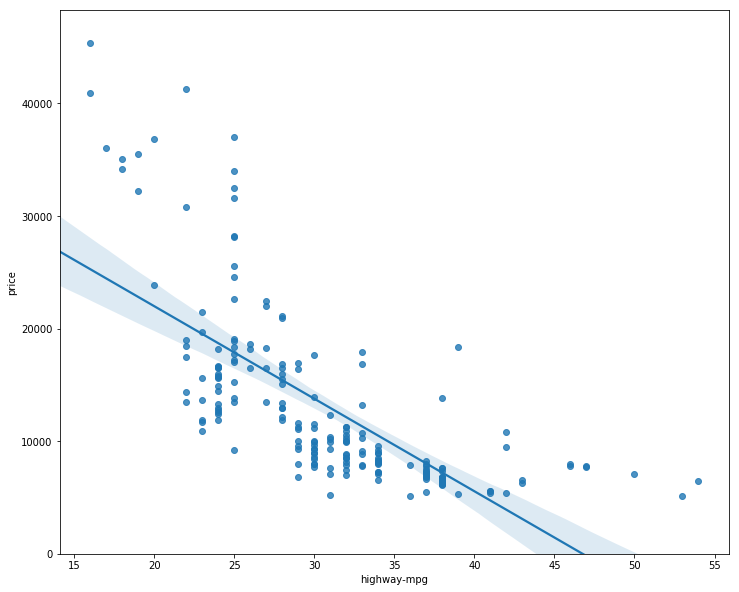

In [93]:
width = 12

length = 10

plt.figure(figsize=(width,length))

sns.regplot(x='highway-mpg', y='price', data=df)

plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

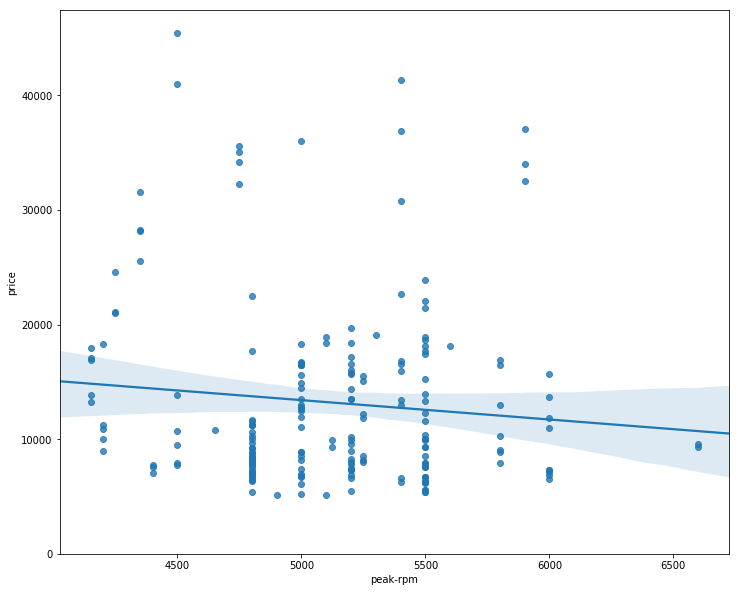

In [94]:
plt.figure(figsize=(width,length))

sns.regplot(x='peak-rpm', y='price', data=df)

plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" We see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [95]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot:

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?


The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.


A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:


If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

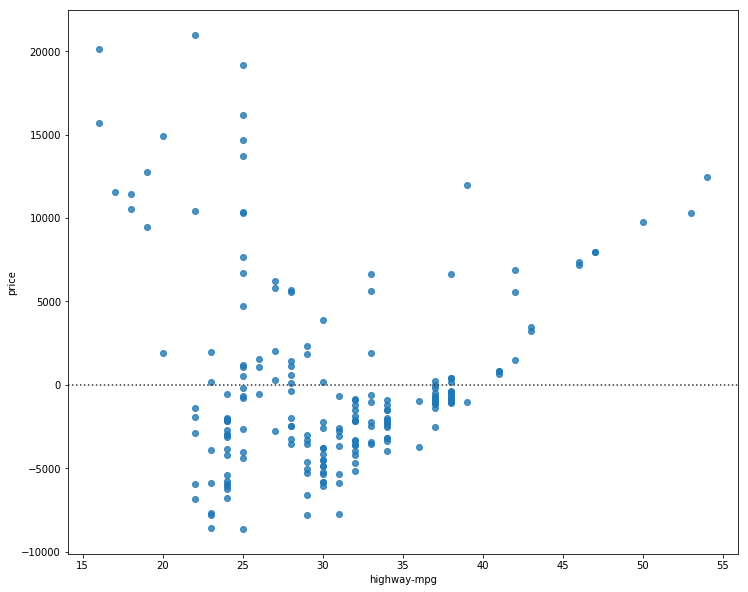

    symboling  normalized-losses  make num-of-doors body-style drive-wheels  \
8           1                158  audi         four      sedan          fwd   
16          0                122   bmw         four      sedan          rwd   

   engine-location  wheel-base    length     width        ...         \
8            front       105.8  0.925997  0.991667        ...          
16           front       110.0  0.946660  0.984722        ...          

    peak-rpm  city-mpg highway-mpg    price  city-L/100km horsepower-binned  \
8     5500.0        17          20  23875.0     13.823529            Medium   
16    5400.0        15          20  36880.0     15.666667              High   

    fuel-type-diesel  fuel-type-gas  aspiration-std  aspiration-turbo  
8                  0              1               0                 1  
16                 0              1               1                 0  

[2 rows x 30 columns]
1886.36170828
14891.3617083


In [118]:
lm3 = LinearRegression()

lm3.fit(df[['highway-mpg']], df['price'])

Y_hat = lm3.predict(df[['highway-mpg']])

diff = df['price'] - Y_hat

width = 12
height = 10
plt.figure(figsize=(width, height))



# doubt: should it not be diff in 2nd arg?

# even if we place diff result is same

sns.residplot(df['highway-mpg'], df['price'])
plt.show()


# verifying:

# from graph we oberve for highway-mpg == 20, residual ~= (1000, 15000)

# query for highway-mpg == 20

print (df.loc[df['highway-mpg'] == 20])

# This returns the rows in df with indexes in (8, 16)

print (df['price'][8] - Y_hat[8])
# This is around 1000

print (df['price'][16] - Y_hat[16])
# This is around 15000

# this value is indeed matching with graph so ok

# so our residula plot is getting plotted correctly either way

*What is this plot telling us?*

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Visualization for MLR:

How do we visualise a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualise it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.


First lets make a prediction

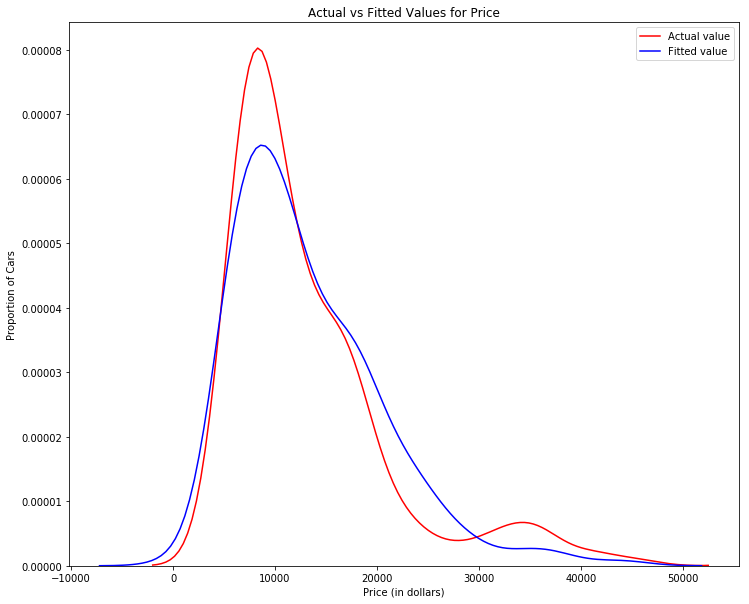

In [121]:
# lm was our MLR model

Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual value')

sns.distplot(Y_hat, hist=False, color='b', label='Fitted value')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Poly Reg:

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

<center>**Quadratic - 2nd order**</center>


 \begin{equation*}
Yhat = a + b_1 X^2 +b_2 X^2 
\\
\end{equation*}


 <center>**Cubic - 3rd order**</center>
 
 
 \begin{equation*}
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
\end{equation*}

<center> **Higher order**:</center>


 \begin{equation*}
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
\end{equation*}

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [122]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")

done


In [123]:
# get the vars:

x = df['highway-mpg']

y = df['price']

# Let's fit the polynomial using the function polyfit, then use the function poly1d
# to display the polynomial function.

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


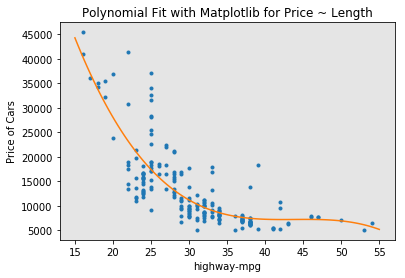

In [124]:
PlotPolly(p,x,y, 'highway-mpg')

In [125]:
np.polyfit(x, y, 3)

array([ -1.55663829e+00,   2.04754306e+02,  -8.96543312e+03,
         1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

Create 11 order polynomial model with the variables x and y from above?:

In [127]:
f = np.polyfit(x, y, 11)

p = np.poly1d(f)

print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08
